In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import string
import os
import glob
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
path = "./hydro"
csv_files = glob.glob(os.path.join(path, "*.csv"))
hydro = pd.DataFrame()
for f in csv_files:
    df = pd.read_csv(f)
    symbol = f.split("\\")[-1].split("_")[0]
    df["Symbol"] = symbol
    hydro = hydro.append(df, ignore_index=True)
print(len(csv_files))
print(hydro.shape)

40
(36387, 10)


In [3]:
path = "./microfinance"
csv_files = glob.glob(os.path.join(path, "*.csv"))
microfinance = pd.DataFrame()
for f in csv_files:
    df = pd.read_csv(f) 
    symbol = f.split("\\")[-1].split("_")[0]
    df["Symbol"] = symbol
    microfinance = microfinance.append(df, ignore_index=True)
print(len(csv_files))
print(microfinance.shape)

45
(47453, 9)


In [4]:
path = "./commercial"
csv_files = glob.glob(os.path.join(path, "*.csv"))
commercial = pd.DataFrame()
for f in csv_files:
    df = pd.read_csv(f)
    symbol = f.split("\\")[-1].split("_")[0]
    df["Symbol"] = symbol
    commercial = commercial.append(df, ignore_index=True)
print(len(csv_files))
print(commercial.shape)

26
(59179, 10)


# Data Cleaning 

### Remove extra column

hydro and commercial has 10 column

In [5]:
hydro.info() , commercial.info() , microfinance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36387 entries, 0 to 36386
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S.N.                 36386 non-null  float64
 1   Date                 36387 non-null  object 
 2   Total Transactions   36386 non-null  object 
 3   Total Traded Shares  36387 non-null  float64
 4   Total Traded Amount  36383 non-null  object 
 5   Max. Price           36387 non-null  float64
 6   Min. Price           36384 non-null  object 
 7   Close Price          36385 non-null  object 
 8   Symbol               36387 non-null  object 
 9   Unnamed: 8           1 non-null      float64
dtypes: float64(4), object(6)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59179 entries, 0 to 59178
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S.N.                 5917

(None, None, None)

In [6]:
hydro.describe()

S.N.  Total Traded Shares     Max. Price  Unnamed: 8
count  36386.000000         3.638700e+04   36387.000000         1.0
mean     680.692657         3.644019e+04     354.551762        57.0
std      588.828806         1.011610e+05    2410.336988         NaN
min        1.000000         1.000000e+00       0.000000        57.0
25%      232.000000         8.425000e+02     125.000000        57.0
50%      507.000000         5.210000e+03     245.000000        57.0
75%      947.000000         2.407800e+04     448.000000        57.0
max     2614.000000         1.896335e+06  456370.000000        57.0

In [7]:
hydro.drop(['Unnamed: 8', 'S.N.'], axis=1, inplace = True)
commercial.drop(['Unnamed: 8', 'S.N.'], axis=1, inplace = True)
microfinance.drop(['S.N.'], axis = 1, inplace = True)

In [8]:
print(hydro.shape, commercial.shape, microfinance.shape)

(36387, 8) (59179, 8) (47453, 8)


### removing characters and convert to float

In [9]:
microfinance[microfinance["Total Traded Amount"] == '*-']

Date  Total Transactions  Total Traded Shares Total Traded Amount  \
42525  7/7/2021                  73               5133.0                  *-   

       Max. Price  Min. Price  Close Price Symbol  
42525      1655.0      1635.0       1635.0  SWBBL

In [10]:
hydro.replace(to_replace =[".", "`", "h", ], value ="", inplace = True)
hydro["Min. Price"].replace({"//80": 80}, inplace=True)
hydro["Total Transactions"].replace({"7/30/2020": ""}, inplace=True)
hydro["Total Traded Amount"].replace({"4113976.3'": 4113976.3, "$9,447,453.10": 9447453.10}, inplace=True)

microfinance["Total Traded Amount"].replace({"*-": 5133.0*1635.0}, inplace=True)
#Unable to parse string "$3,762,384.00" at position 49179
commercial["Total Traded Amount"].replace({"$3,762,384.00": 3762384}, inplace=True)

In [11]:
hydro['Close Price'] = pd.to_numeric(hydro['Close Price'])
hydro['Max. Price'] = pd.to_numeric(hydro['Max. Price'])
hydro['Min. Price'] = pd.to_numeric(hydro['Min. Price'])
hydro['Total Transactions'] = pd.to_numeric(hydro['Total Transactions'])
hydro['Total Traded Amount'] = pd.to_numeric(hydro['Total Traded Amount'])

In [12]:
commercial['Total Traded Amount'] = pd.to_numeric(commercial['Total Traded Amount'])
microfinance['Total Traded Amount'] = pd.to_numeric(microfinance['Total Traded Amount'])

### Remove duplicates

In [13]:
org_shape = hydro.shape
duplicate = hydro[hydro.duplicated(['Date', 'Symbol'])]
hydro.drop_duplicates(['Date', 'Symbol'], inplace = True)
print(org_shape, duplicate.shape, hydro.shape)

(36387, 8) (50, 8) (36337, 8)


In [14]:
org_shape = commercial.shape
duplicate = commercial[commercial.duplicated(['Date', 'Symbol'])]
commercial.drop_duplicates(['Date', 'Symbol'], inplace = True)
print(org_shape, duplicate.shape, commercial.shape)

(59179, 8) (58, 8) (59121, 8)


In [15]:
org_shape = microfinance.shape
duplicate = microfinance[microfinance.duplicated(['Date', 'Symbol'])]
microfinance.drop_duplicates(['Date', 'Symbol'], inplace = True)
print(org_shape, duplicate.shape, microfinance.shape)

(47453, 8) (34, 8) (47419, 8)


 ### handling null values

In [16]:
hydro[hydro.isna().any(axis=1)]

Date  Total Transactions  Total Traded Shares  \
2630    12/6/2021              1004.0             187946.0   
2655   10/27/2021               547.0             100385.0   
2664   10/11/2021                55.0               4904.0   
2674    9/26/2021                 NaN              19904.0   
2694    8/25/2021               632.0              52525.0   
2878   11/26/2020               272.0              18303.0   
2908    10/7/2020               512.0              29325.0   
2929     9/8/2020                59.0               2015.0   
2950     8/9/2020                75.0               1250.0   
2957          342                 NaN                 63.0   
3272     1/8/2019               132.0               1560.0   
3279   12/30/2018                28.0                420.0   
33059  11/28/2021               273.0              41288.0   
33156   6/28/2021               187.0              38664.0   

       Total Traded Amount  Max. Price  Min. Price  Close Price Symbol  
2630            56541868.7       320.0       283.4          NaN  AKJCL  
2655                   NaN       370.0       343.0        349.0  AKJCL  
2664             1490180.0       311.0         NaN        308.0  AKJCL  
2674             6984640.5       372.0       342.0        351.9  AKJCL  
2694            20513483.3       401.4         NaN        392.0  AKJCL  
2878                   NaN       160.0       153.0        160.0  AKJCL  
2908             3862085.0       133.0       121.0          NaN  AKJCL  
2929                   NaN        68.0        61.0         63.0  AKJCL  
2950               64460.0        55.0         NaN         53.0  AKJCL  
2957                8030.0    456370.0        57.0         53.0  AKJCL  
3272                   NaN        95.0        89.0         95.0  AKJCL  
3279               41400.0       100.0        98.0          NaN  AKJCL  
33059           14939503.6       375.0         NaN        357.0   SSHL  
33156           12752235.0       341.0         NaN        324.0   SSHL

In [17]:
commercial[commercial.isna().any(axis=1)]

Date  Total Transactions  Total Traded Shares  \
8313   11/15/2021                 263              45621.0   
8559          NaN                 219              62713.0   
10800  11/22/2010                   8                660.0   

       Total Traded Amount  Max. Price  Min. Price  Close Price Symbol  
8313                   NaN       296.0       290.0        292.0  CZBIL  
8559            14663581.0       235.0       232.0        233.0  CZBIL  
10800             195810.0         NaN       295.0        295.0  CZBIL

In [18]:
microfinance[microfinance.isna().any(axis=1)]

Empty DataFrame
Columns: [Date, Total Transactions, Total Traded Shares, Total Traded Amount, Max. Price, Min. Price, Close Price, Symbol]
Index: []

### Close price is always in range max >= close >= min

In [19]:
def handleNullClosePrice(dataframe):
    null_close_price = dataframe[dataframe['Close Price'].isnull()]
    for index, row in null_close_price.iterrows():
        value = (row['Max. Price'] )+ int (row['Min. Price']) / 2 
        dataframe.loc[index,'Close Price'] = value

In [20]:
handleNullClosePrice(hydro)
hydro[hydro['Close Price'].isnull()]

Empty DataFrame
Columns: [Date, Total Transactions, Total Traded Shares, Total Traded Amount, Max. Price, Min. Price, Close Price, Symbol]
Index: []

In [21]:
def handleNullTotalTradedAmount(dataframe):
    null_t_t_amount = dataframe[dataframe['Total Traded Amount'].isnull()]
    for index, row in null_t_t_amount.iterrows():
        value = row['Total Traded Shares'] *  np.average([row['Max. Price'], row['Min. Price']])
        dataframe.loc[index,'Total Traded Amount'] = value

In [22]:
handleNullTotalTradedAmount(hydro)
hydro[hydro['Total Traded Amount'].isnull()]

Empty DataFrame
Columns: [Date, Total Transactions, Total Traded Shares, Total Traded Amount, Max. Price, Min. Price, Close Price, Symbol]
Index: []

In [23]:
handleNullTotalTradedAmount(commercial)
commercial[commercial['Total Traded Amount'].isnull()]

Empty DataFrame
Columns: [Date, Total Transactions, Total Traded Shares, Total Traded Amount, Max. Price, Min. Price, Close Price, Symbol]
Index: []

### minimum price is aways < Max. Price and < close price

In [24]:
def handleNullMinPrice(dataframe):
    null_min_price = dataframe[dataframe['Min. Price'].isnull()]
    for index, row in null_min_price.iterrows(): 
        dataframe.loc[index,'Min. Price'] = min([row['Close Price'], row['Max. Price']])

In [25]:
handleNullMinPrice(hydro)
hydro[hydro['Min. Price'].isnull()]

Empty DataFrame
Columns: [Date, Total Transactions, Total Traded Shares, Total Traded Amount, Max. Price, Min. Price, Close Price, Symbol]
Index: []

only one missing max price in commercial

In [26]:
commercial.loc[10800,'Max. Price'] = 295.0

## Handle Date

In [27]:
hydro['Date'] = pd.to_datetime(hydro['Date'], errors='coerce')
hydro[hydro['Date'].isnull()]

Date  Total Transactions  Total Traded Shares  Total Traded Amount  \
2804  NaT               391.0              54696.0            8404153.0   
2957  NaT                 NaN                 63.0               8030.0   

      Max. Price  Min. Price  Close Price Symbol  
2804       157.0       145.0        157.0  AKJCL  
2957    456370.0        57.0         53.0  AKJCL

In [28]:
hydro.loc[2803: 2805]

Date  Total Transactions  Total Traded Shares  Total Traded Amount  \
2803 2021-03-16               337.0              45499.0            7351310.0   
2804        NaT               391.0              54696.0            8404153.0   
2805 2021-03-14               182.0              17438.0            2478556.0   

      Max. Price  Min. Price  Close Price Symbol  
2803       169.0       155.0        155.0  AKJCL  
2804       157.0       145.0        157.0  AKJCL  
2805       149.0       138.0        144.0  AKJCL

In [29]:
pd.to_datetime("2021-03-15").weekday()

0

In [30]:
hydro.loc[2804,'Date'] = pd.to_datetime("2021-03-15")

In [31]:
hydro = hydro.dropna(subset=['Date'])

In [32]:
hydro.loc[2672: 2676]

Date  Total Transactions  Total Traded Shares  Total Traded Amount  \
2672 2021-09-28               208.0              16991.0            5421946.5   
2673 2021-09-27               146.0               9732.0            3299005.0   
2674 2021-09-26                 NaN              19904.0            6984640.5   
2675 2021-09-23               170.0              12831.0            4873237.4   
2676 2021-09-22               217.0              22861.0            8618585.3   

      Max. Price  Min. Price  Close Price Symbol  
2672       340.0       309.0        312.9  AKJCL  
2673       366.0       330.0        340.0  AKJCL  
2674       372.0       342.0        351.9  AKJCL  
2675       390.0       365.0        372.0  AKJCL  
2676       385.0       362.1        384.0  AKJCL

In [33]:
hydro.loc[2674,'Total Transactions'] = (hydro.loc[2673,'Total Transactions'] + hydro.loc[2675,'Total Transactions']) / 2

In [34]:
commercial['Date'] = pd.to_datetime(commercial['Date'], errors='coerce')
commercial[commercial['Date'].isnull()]

Date  Total Transactions  Total Traded Shares  Total Traded Amount  \
8559  NaT                 219              62713.0           14663581.0   

      Max. Price  Min. Price  Close Price Symbol  
8559       235.0       232.0        233.0  CZBIL

In [35]:
commercial.loc[8558: 8560]

Date  Total Transactions  Total Traded Shares  Total Traded Amount  \
8558 2020-11-05                 365              88066.0           20567293.0   
8559        NaT                 219              62713.0           14663581.0   
8560 2020-11-03                 304              75511.0           17726781.0   

      Max. Price  Min. Price  Close Price Symbol  
8558       236.0       232.0        232.0  CZBIL  
8559       235.0       232.0        233.0  CZBIL  
8560       237.0       232.0        234.0  CZBIL

In [36]:
pd.to_datetime("2020-11-04").weekday()

2

In [37]:
commercial.loc[8559,'Date'] = pd.to_datetime("2020-11-4")

In [38]:
microfinance['Date'] = pd.to_datetime(microfinance['Date'], errors='coerce')
microfinance[microfinance['Date'].isnull()]

Empty DataFrame
Columns: [Date, Total Transactions, Total Traded Shares, Total Traded Amount, Max. Price, Min. Price, Close Price, Symbol]
Index: []

### Handling zero values

In [39]:
# 0 value in hydro, commercial, micrfinace
len(hydro[hydro.eq(0).any(axis=1)]), len(commercial[commercial.eq(0).any(axis=1)]), len(microfinance[microfinance.eq(0).any(axis=1)])

(8, 25, 71)

In [40]:
def handleZero(dataframe):
    zero_close_price = dataframe[dataframe.eq(0).any(axis=1)]
    for index, row in zero_close_price.iterrows(): 
        value = (row['Max. Price']  + row['Min. Price']) / 2 
        dataframe.loc[index,'Close Price'] = value
    zero_close_price = dataframe[dataframe.eq(0).any(axis=1)]

    for index, row in zero_close_price.iterrows(): 
        value = row['Total Traded Amount']  / row['Total Traded Shares'] 
        dataframe.loc[index,'Max. Price'] = value
        dataframe.loc[index,'Min. Price'] = value
        dataframe.loc[index,'Close Price'] = value

In [41]:
handleZero(hydro)
hydro[hydro.eq(0).any(axis=1)].shape

(0, 8)

In [42]:
handleZero(commercial)
commercial[commercial.eq(0).any(axis=1)].shape

(0, 8)

In [43]:
handleZero(microfinance)
microfinance[microfinance.eq(0).any(axis=1)].shape

(0, 8)

# Data Visualization

In [44]:
hydro_sample = hydro[hydro['Symbol'].isin(['API','AHPC', 'SHPC'])]
commercial_sample = commercial[commercial['Symbol'].isin(['NMB', 'ADBL', 'NABIL'])]
microfinance_sample = microfinance[microfinance['Symbol'].isin(['NLBBL', 'CBBL', 'DDBL'])]
sample = pd.DataFrame()
sample = sample.append(hydro_sample, ignore_index=True)
sample = sample.append(commercial_sample, ignore_index=True)
sample = sample.append(microfinance_sample, ignore_index=True)

In [45]:
sample.sort_values('Date', inplace= True)
import plotly.express as px

fig = px.line(sample.tail(1000), x= 'Date', y='Close Price', color='Symbol')

fig.show()

In [46]:
API = hydro[hydro["Symbol"] == "API"].sort_values('Date').reset_index(drop = True)[-1000: ]
CHL = hydro[hydro["Symbol"] == "CHL"].sort_values('Date').reset_index(drop = True)[-1000: ]

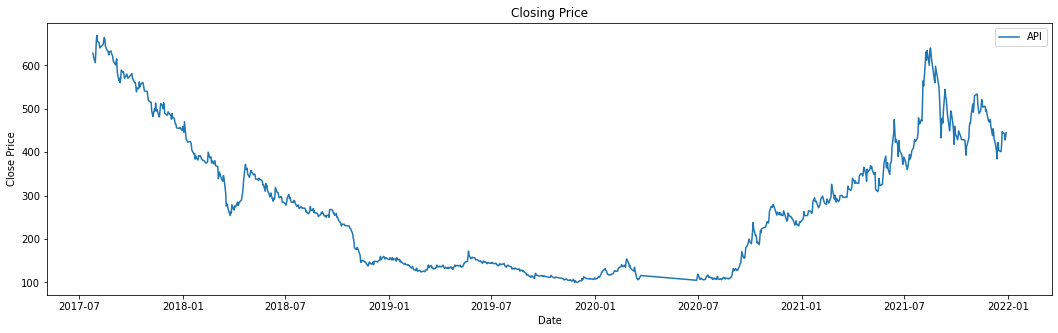

In [47]:
plt.figure(figsize=(18,5))

plt.plot(API['Date'], API['Close Price'], label = "API")
plt.title("Closing Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

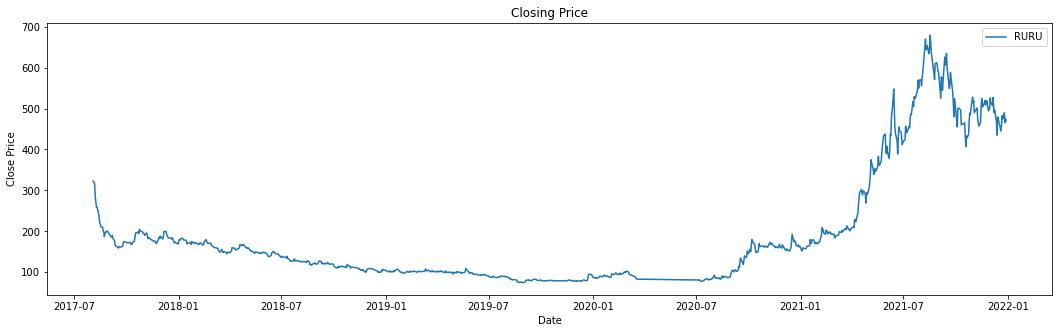

In [48]:
plt.figure(figsize=(18,5))
plt.plot(CHL['Date'], CHL['Close Price'], label = "RURU")
plt.title("Closing Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [49]:
API_change = pd.DataFrame(columns = ['Day', 'Change', 'Change P'])
i = 0
for index, row in API[:-1].iterrows(): 
    day1 = API.loc[index, "Close Price"]
    day2 = API.loc[index + 1, "Close Price"]
    change = abs(day2 - day1)
    changeP = change/day1 * 100
    if (changeP > 9):
        i = i + 1
        print(f'{i} {str(API.loc[index + 1, "Date"]).split(" ")[0]} = {(day2 - day1):.2f}' )
                                   
    if(changeP >= 5 and changeP <= 10):
            API_change = API_change.append({'Day': API.loc[index + 1, "Date"], 'Change' : change, 'Change P' : changeP}, ignore_index = True)

1 2018-03-18 = -34.00
2 2018-03-19 = -30.00
3 2018-04-22 = 33.00
4 2018-11-11 = -18.00
5 2018-11-12 = -16.00
6 2019-05-22 = 15.00
7 2019-09-17 = 10.00
8 2020-02-25 = 13.00
9 2020-03-15 = -17.00
10 2020-06-29 = -11.00
11 2020-09-02 = 12.00
12 2020-09-17 = 15.00
13 2020-09-24 = 16.00
14 2020-10-07 = 21.00
15 2020-10-19 = 18.00
16 2021-02-23 = 29.00
17 2021-05-12 = -39.00
18 2021-05-27 = 34.00
19 2021-06-22 = 37.00
20 2021-08-04 = 51.30
21 2021-08-08 = 55.20
22 2021-09-05 = -96.00
23 2021-09-06 = 43.30
24 2021-09-12 = 49.50
25 2021-09-29 = 41.80
26 2021-12-14 = 37.50


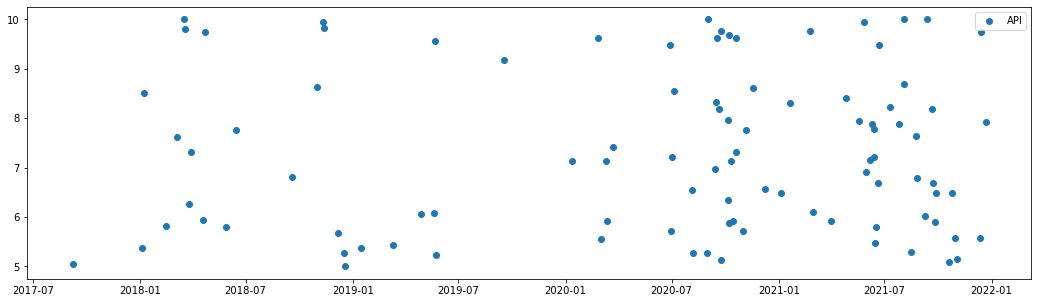

In [50]:
plt.figure(figsize=(18,5))
plt.scatter(API_change['Day'][-1000:], API_change['Change P'][-1000:], label = "API")
plt.legend()
plt.show()

In [51]:
cph = hydro.groupby('Date')['Close Price'].mean().reset_index()[-1000:]
cpc = commercial.groupby('Date')['Close Price'].mean().reset_index()[-1000:]
cpm = microfinance.groupby('Date')['Close Price'].mean().reset_index()[-1000:]

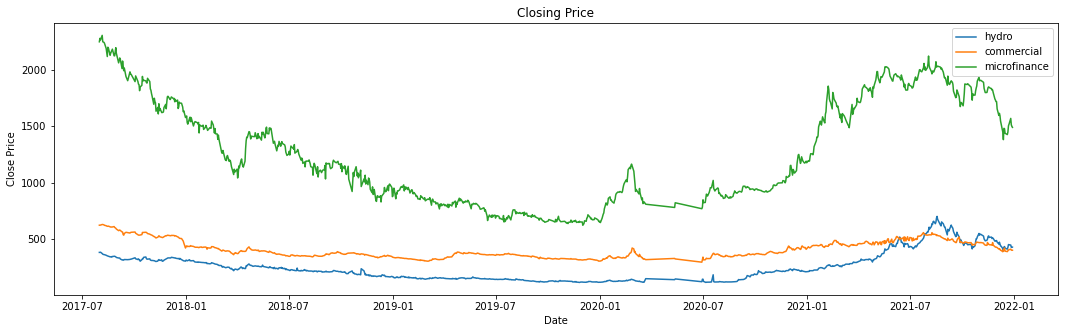

In [52]:
plt.figure(figsize=(18,5))
plt.plot(cph['Date'], cph['Close Price'], label = "hydro")
plt.plot(cpc['Date'], cpc['Close Price'], label = "commercial")
plt.plot(cpm['Date'], cpm['Close Price'], label = "microfinance")
plt.title("Closing Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [53]:
ttah = hydro.groupby('Date')['Total Traded Amount'].mean().reset_index()[-1000:]
ttac = commercial.groupby('Date')['Total Traded Amount'].mean().reset_index()[-1000:]
ttam = microfinance.groupby('Date')['Total Traded Amount'].mean().reset_index()[-1000:]

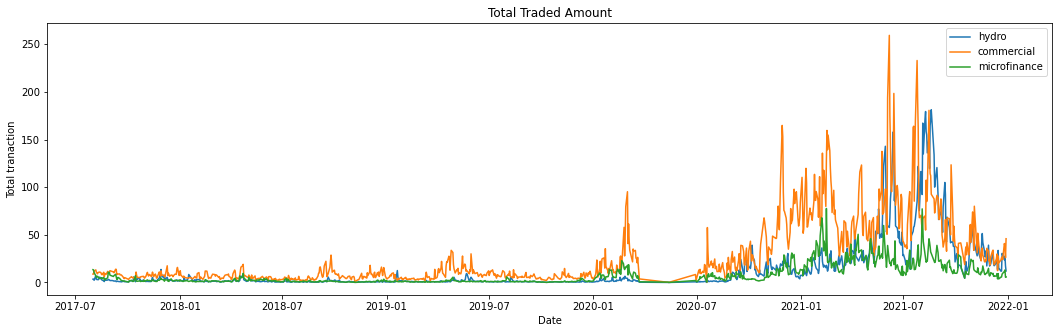

In [54]:
plt.figure(figsize=(18,5))
plt.plot(ttah['Date'], ttah['Total Traded Amount']/1000000, label = "hydro")
plt.plot(ttac['Date'], ttac['Total Traded Amount']/1000000, label = "commercial")
plt.plot(ttam['Date'], ttam['Total Traded Amount']/1000000, label = "microfinance")
plt.title("Total Traded Amount")
plt.xlabel("Date")
plt.ylabel("Total tranaction")
plt.legend()
plt.show()

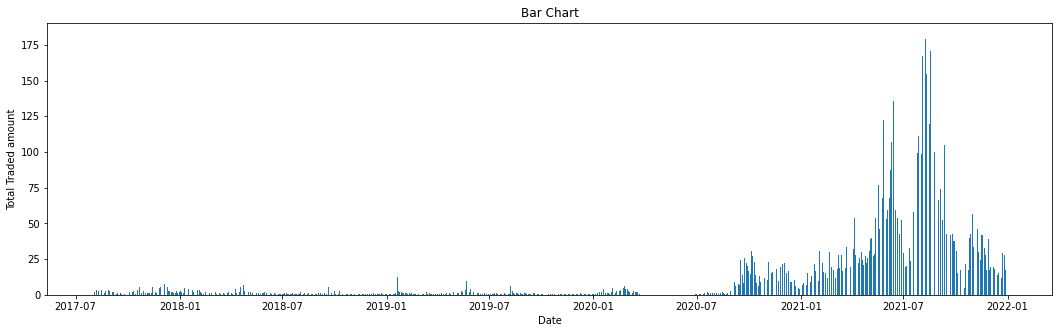

In [55]:
plt.figure(figsize=(18,5))
plt.bar(ttah['Date'], ttah['Total Traded Amount']/1000000)
plt.title("Bar Chart")
plt.xlabel('Date')
plt.ylabel('Total Traded amount')
plt.show()

In [56]:
ttah = hydro.groupby('Date')['Total Traded Amount'].mean().reset_index()
ttac = commercial.groupby('Date')['Total Traded Amount'].mean().reset_index()
ttam = microfinance.groupby('Date')['Total Traded Amount'].mean().reset_index()

In [57]:
API = hydro[hydro["Symbol"] == "API"].sort_values('Date').reset_index(drop = True)
max_row = API.iloc[API['Max. Price'].idxmax()]
min_row = API.iloc[API['Min. Price'].idxmin()]
max_row['Total Traded Shares'], min_row['Total Traded Shares']

(12504.0, 23154.0)

In [58]:
CHL = hydro[hydro["Symbol"] == "CHL"].sort_values('Date').reset_index(drop = True)
max_row_CHL = CHL.iloc[CHL['Max. Price'].idxmax()]
min_row_CHL = CHL.iloc[CHL['Min. Price'].idxmin()]
max_row_CHL['Total Traded Shares'], min_row_CHL['Total Traded Shares']

(108897.0, 60.0)

In [59]:
def pichart(date):
    h = ttah[ttah['Date'] == date].iloc[0]['Total Traded Amount']
    c = ttac[ttac['Date'] == date].iloc[0]['Total Traded Amount']
    m = ttam[ttam['Date'] == date].iloc[0]['Total Traded Amount']
    
    plt.figure(figsize=(18,5))
    sub = ['hydro', 'microfinace', 'commercial']
 
    slices = [h, m, c]
    colors = ['r', 'y', 'g']
 
    plt.pie(slices, labels = sub, colors=colors,
    startangle=90, shadow = True, explode = (0, 0.1, 0.1),
    radius = 1.2, autopct = '%1.1f%%')
 
    plt.legend()
    plt.show()

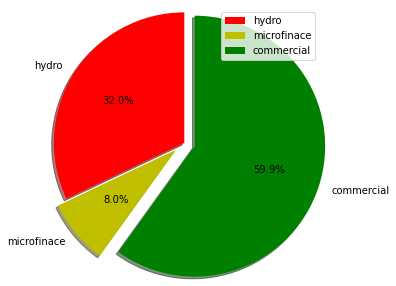

In [60]:
date = str(max_row['Date']).split(" ")[0]
pichart(date)

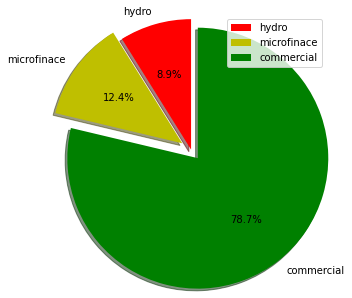

In [61]:
date = str(min_row['Date']).split(" ")[0]
pichart(date)

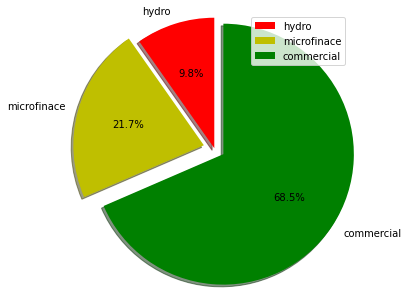

In [62]:
date = str(min_row_CHL['Date']).split(" ")[0]
pichart(date)

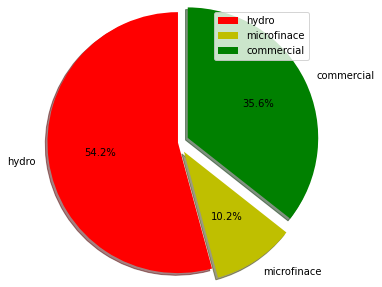

In [63]:
date = str(max_row_CHL['Date']).split(" ")[0]
pichart(date)

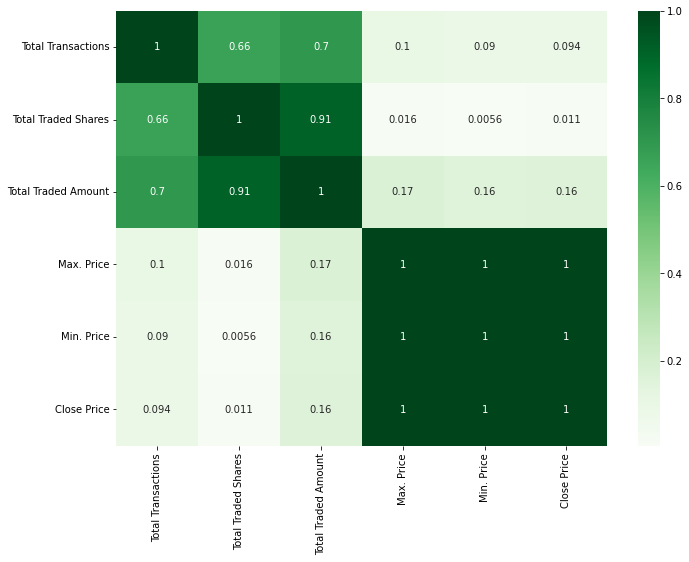

In [64]:
corr = microfinance.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

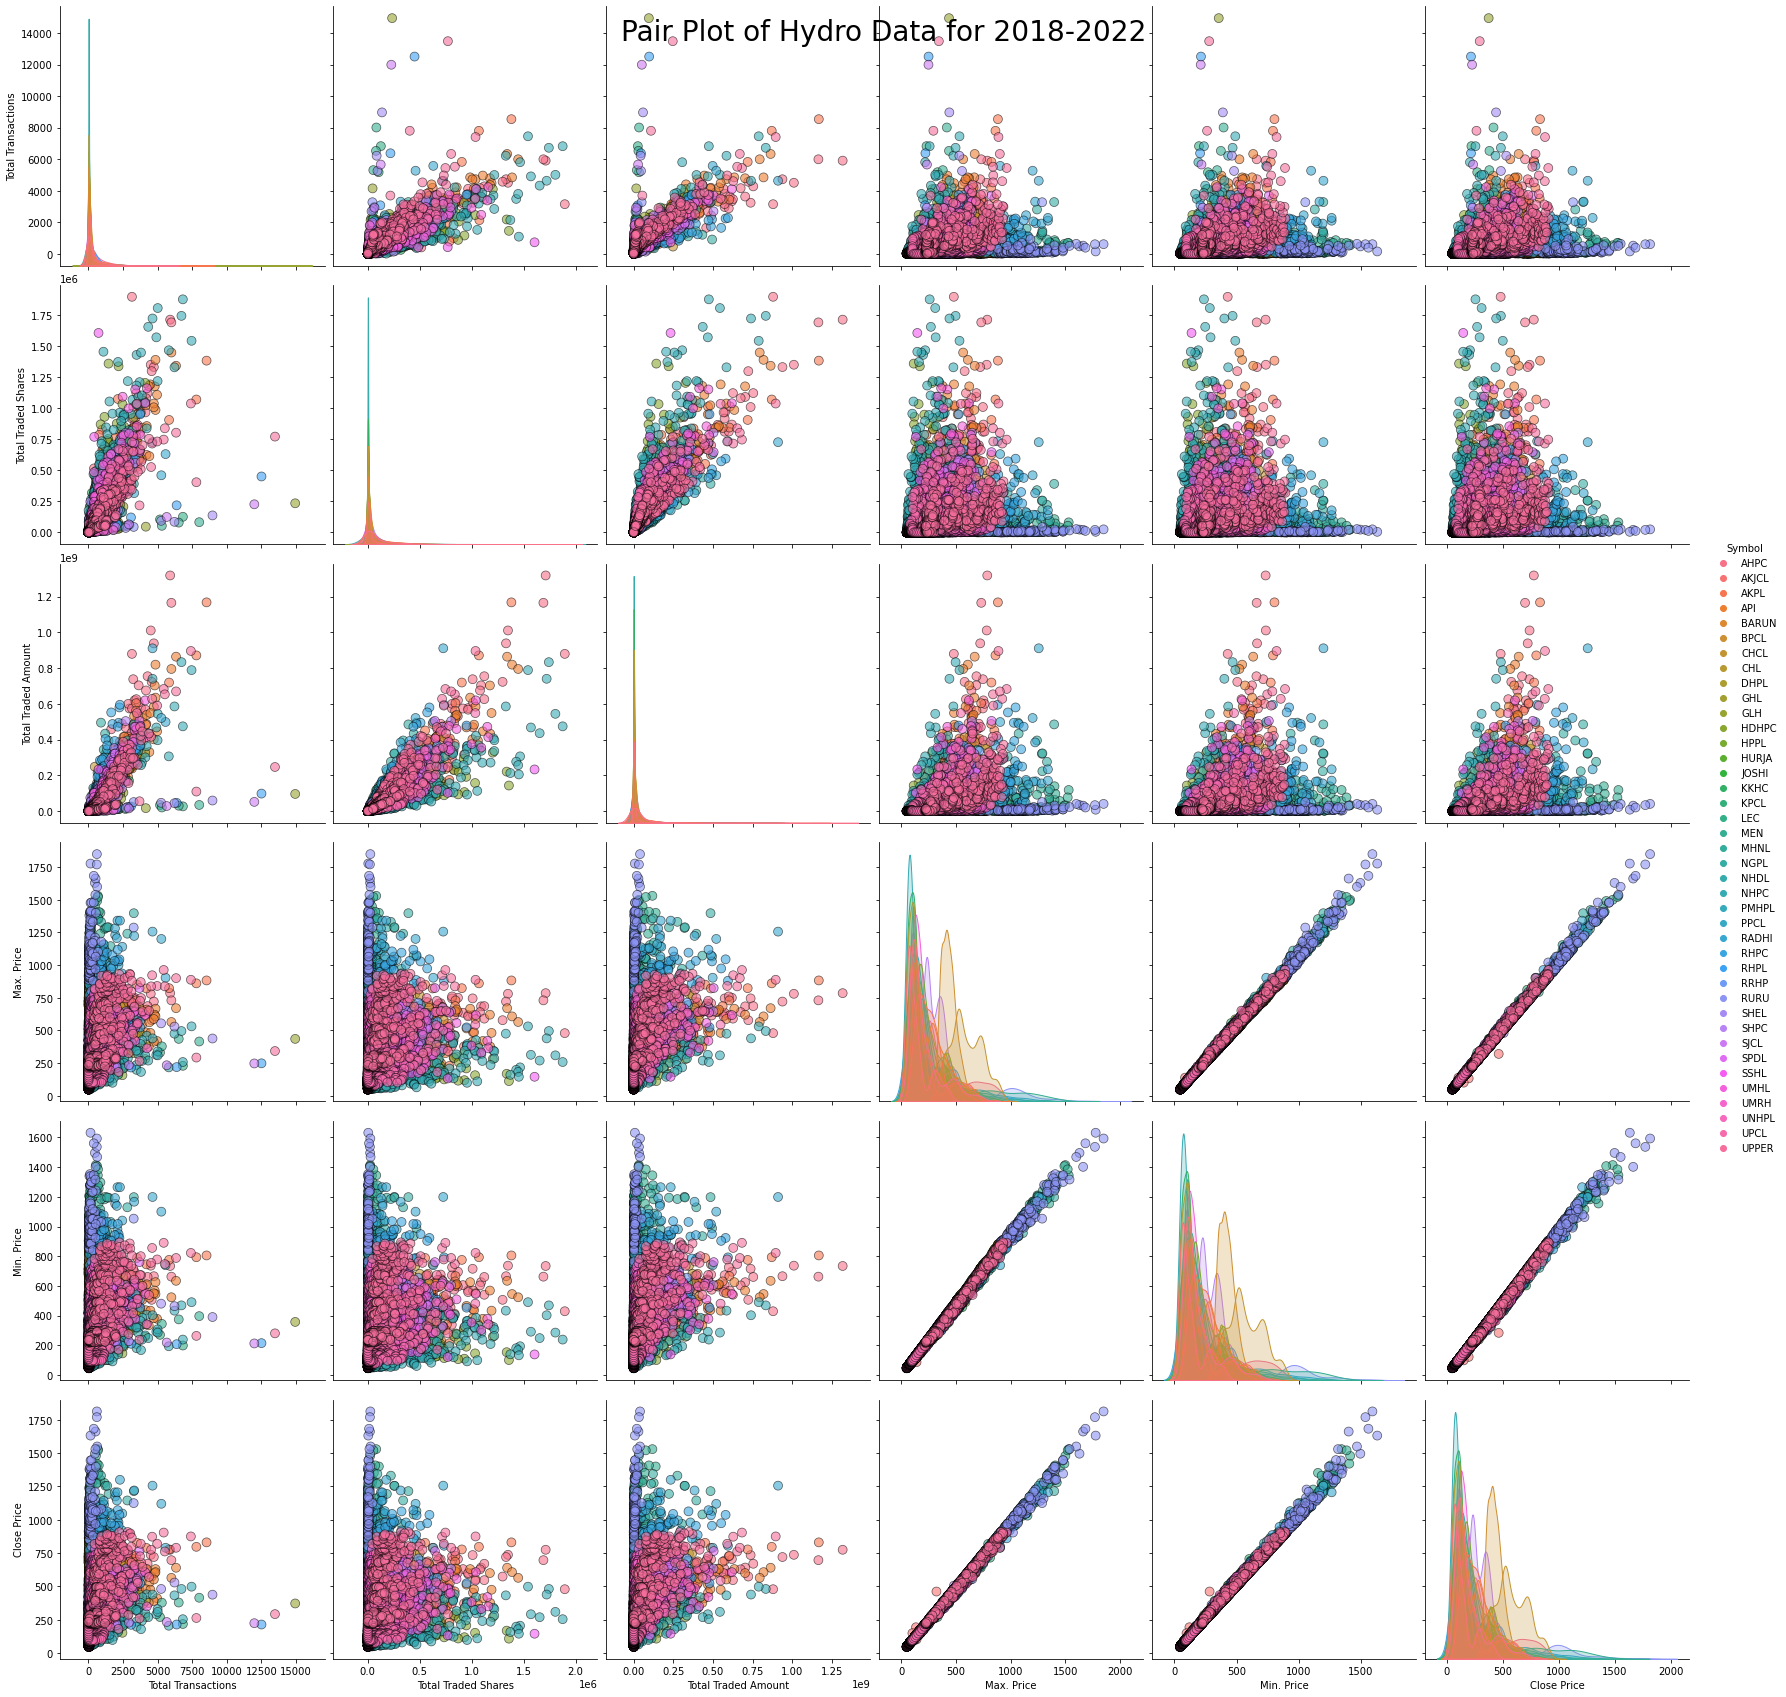

In [65]:
sns.pairplot(hydro[hydro['Date'] >= pd.to_datetime('2018-01-01')], 
             vars = ['Total Transactions', 'Total Traded Shares', 'Total Traded Amount', 'Max. Price', 'Min. Price', 'Close Price'], 
             hue = 'Symbol', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);
# Title 
plt.suptitle('Pair Plot of Hydro Data for 2018-2022', 
             size = 28);

# Build model

In [66]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators= 50)

In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [68]:
def preprocesing(dataframe):
    one_hot = pd.get_dummies(dataframe['Symbol'])
    dataframe = dataframe.drop('Symbol',axis = 1)
    dataframe = dataframe.join(one_hot)
    
    dataframe['Day'] = pd.to_numeric(dataframe['Date'].dt.day)
    dataframe['Month'] = pd.to_numeric(dataframe['Date'].dt.month)
    dataframe['year'] = pd.to_numeric(dataframe['Date'].dt.year)
    dataframe = dataframe.drop('Date',axis = 1)
    
    feature = dataframe.drop('Close Price', axis=1)
    target = dataframe['Close Price']
    
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2,random_state=42)
    
    return x_train, x_test, y_train, y_test

In [69]:
def randomForest(x_train, x_test, y_train, y_test): 
    rfr.fit(x_train, y_train)
    score = rfr.score(x_test, y_test)
    
    return score

In [70]:
def linearRegression(x_train, x_test, y_train, y_test): 
    lr.fit(x_train, y_train)    
    score = lr.score(x_test, y_test)
    
    return score

In [71]:
x_train, x_test, y_train, y_test = preprocesing(hydro)
rf_score = randomForest(x_train, x_test, y_train, y_test)
lr_score = linearRegression(x_train, x_test, y_train, y_test)
print(f'Linear regression: {lr_score} and Random Forest Regressor: {rf_score} on hydrocompany')

Linear regression: 0.9993460037260078 and Random Forest Regressor: 0.9992565779947472 on hydrocompany


In [72]:
x_train, x_test, y_train, y_test = preprocesing(commercial)
rf_score = randomForest(x_train, x_test, y_train, y_test)
lr_score = linearRegression(x_train, x_test, y_train, y_test)
print(f'Linear regression: {lr_score} and Random Forest Regressor: {rf_score} on commercial banks')

Linear regression: 0.9997162670866614 and Random Forest Regressor: 0.9996738362615212 on commercial banks


In [73]:
x_train, x_test, y_train, y_test = preprocesing(microfinance)
rf_score = randomForest(x_train, x_test, y_train, y_test)
lr_score = linearRegression(x_train, x_test, y_train, y_test)
print(f'Linear regression: {lr_score} and Random Forest Regressor: {rf_score} on microfinanace')

Linear regression: 0.999073750141339 and Random Forest Regressor: 0.9989235525141283 on microfinanace
